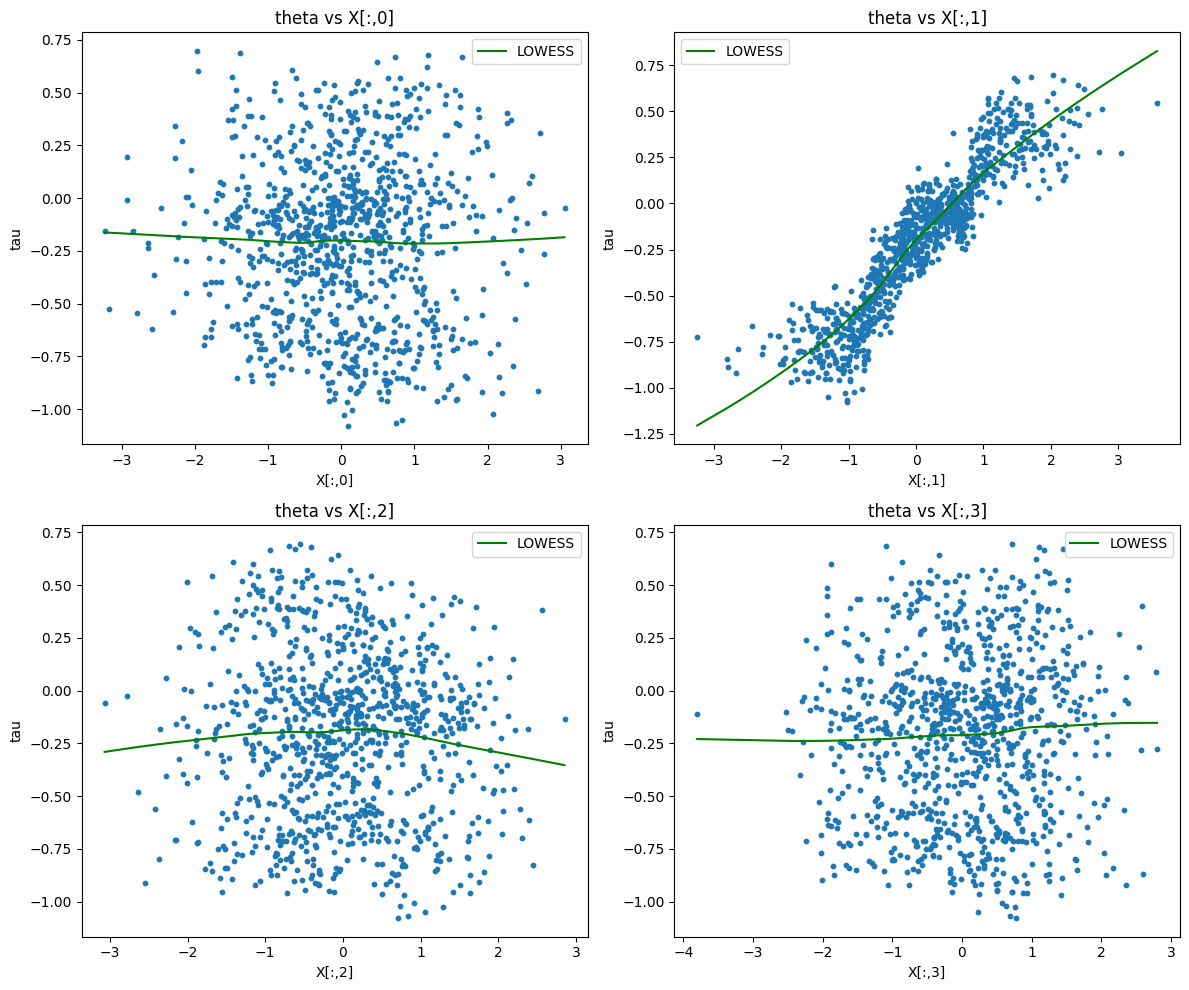

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy
from econml.dml import CausalForestDML

np.random.seed(123)
X = np.random.normal(size=(1000, 5))
T = np.random.binomial(1, scipy.special.expit(X[:, 0]))
y = (-.25 + .5*X[:, 1]) * T + 0.75* X[:, 3] + np.random.normal(size=(1000,))
est = CausalForestDML(discrete_treatment=True)
est.fit(y, T, X=X, W=None)
Xtest = np.random.normal(size=(20, 5))
theta=est.effect(Xtest)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

def plot_with_fit_and_lowess(ax, x, y, title):
    # Scatter plot with smaller points
    ax.scatter(x, y, s=10)  # s=10 makes points smaller
    
    # Polynomial fit (degree 1 for a line)
    #slope, intercept, _, _, _ = linregress(x, y)
    #ax.plot(x, slope*x + intercept, 'r-', label='Poly fit')
    
    # LOWESS smoother
    smoothed = lowess(y, x)
    ax.plot(smoothed[:, 0], smoothed[:, 1], 'g-', label='LOWESS')
    
    ax.set_title(title)
    ax.set_xlabel(title.split()[-1])
    ax.set_ylabel('tau')
    ax.legend()

plot_with_fit_and_lowess(axs[0, 0], X[:, 0], tau_all, 'theta vs X[:,0]')
plot_with_fit_and_lowess(axs[0, 1], X[:, 1], tau_all, 'theta vs X[:,1]')
plot_with_fit_and_lowess(axs[1, 0], X[:, 2], tau_all, 'theta vs X[:,2]')
plot_with_fit_and_lowess(axs[1, 1], X[:, 3], tau_all, 'theta vs X[:,3]')

plt.tight_layout()
plt.show()


In [23]:
est.feature_importances_

array([0.13514351, 0.66053179, 0.07635017, 0.07370762, 0.05426691])